# Analisis Lanjutan pada Konten Artikel Berita SatuSehat

## SET UP

In [1]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as dates

In [2]:
# Upload File
from google.colab import files
uploaded = files.upload()

satusehat_news_df = pd.read_excel(list(uploaded.keys())[0])

Saving satusehat_news_df_after_stopwords_lemm.xlsx to satusehat_news_df_after_stopwords_lemm.xlsx


In [ ]:
satusehat_news_df

,link,judul,tanggal,portal,content,tags,status,tahun,wordCount,content_without_stopwords,wordcount_after_stopwords,content_stem_without_stopwords,wordcount_stem_without_stopwords,content_lemmatized,wordcount_lemmatized
0,https://cahayasiang.id/dinilai-peduli-lindungi...,"dinilai PeduliLindungi para pekerja, bpjs kete...",2024-09-22,Cahaya Siang,"dinilai PeduliLindungi para pekerja, bpjs ke...",Tidak ada tags,success,2024,604,dinilai PeduliLindungi pekerja bpjs ketenagake...,373,nilai pedulilindungi kerja bpjs ketenagakerjaa...,372,dinilai PeduliLindungi pekerja bpjs ketenagake...,373
1,https://memorandum.disway.id/read/114165/pemer...,pemerintah tingkatkan layanan haji dan umrah m...,2024-09-15,Memorandum.co.id,06 okt 2024 06 okt 2024 polrestabes surabaya 2...,"ketua fk patuh jatim,vaksin maningitis,satu se...",success,2024,488,06 okt 2024 06 okt 2024 polrestabes surabaya 2...,315,06 okt 2024 06 okt 2024 polrestabes surabaya 2...,315,06 okt 2024 06 okt 2024 polrestabes surabaya 2...,315
2,https://www.bicaranetwork.com/kesehatan/295134...,tutorial cara isi formulir SatuSehat pasca pul...,2024-09-06,Bicara Network,bicaranetwork.com - guna menanggulangi penyeba...,"mpox, Satu Sehat, cara isi formulir",success,2024,365,bicaranetworkcom menanggulangi penyebaran peny...,211,bicaranetworkcom tanggulang sebar sakit cacar ...,211,bicaranetworkcom menanggulangi penyebaran peny...,211
3,https://www.genpi.co/kesehatan/245752/bandara-...,bandara i gusti ngurah rai wajibkan penumpang ...,2024-09-06,GenPI.co,genpi.co - bandara i gusti ngurah rai bali mew...,"Berita terkini mpox, cacar monyet, Monkeypox,...",success,2024,219,genpico bandara i gusti ngurah rai bali mewaji...,129,genpico bandara i gusti ngurah rai bal wajib t...,129,genpico bandara i gusti ngurah rai bali mewaji...,129
4,https://newsindonesia.co.id/read/berita-sumene...,"transformasi digital, rsud moh anwar sumenep b...",2024-02-01,newsindonesia.co.id,news indonesia . foto: direktur rumah sakit ...,Tidak ada tags,success,2024,542,news indonesia foto direktur rumah sakit daera...,292,news indonesia foto direktur rumah sakit daera...,292,news indonesia foto direktur rumah sakit daera...,292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,https://www.beritamerdekaonline.com/2021/07/pe...,perumahan tas blok m & n motto satgas “PeduliL...,2021-07-21,Berita Merdeka Online,"sidoarjo, beritamerdekaonline.com – kegiatan m...",Tidak ada tags,success,2021,698,sidoarjo beritamerdekaonlinecom kegiatan mulia...,408,sidoarjo beritamerdekaonlinecom giat mulia war...,398,sidoarjo beritamerdekaonlinecom kegiatan mulia...,408
157,https://www.idxchannel.com/economics/masih-bin...,masih bingung? ini tips mudah download dan cet...,2021-07-12,IDX Channel,– diberlakukannya kebijakan pemberlakuan pemb...,"IDX, BEI, Pasar modal, Vakinsasi",success,2021,470,diberlakukannya kebijakan pemberlakuan pembata...,272,laku bijak laku batas giat masyarakat ppkm dar...,272,diberlakukannya kebijakan pemberlakuan pembata...,272
158,https://sehatnegeriku.kemkes.go.id/baca/umum/2...,kemenkes luncurkan qr code untuk aplikasi Pedu...,2021-07-01,Sehat Negeriku,"bali, 1 juli 2021 kementerian kesehatan (kemen...",Tidak ada tags,success,2021,750,bali 1 juli 2021 kementerian kesehatan kemenke...,427,bal 1 juli 2021 menteri sehat kemenkes perinta...,427,bali 1 juli 2021 kementerian kesehatan kemenke...,427
159,https://www.suara.com/health/2021/01/18/114052...,cara mendapatkan vaksin covid-19 gratis dari p...,2021-01-18,Suara.com,suara.com - seperti yang telah diketahui bersa...,"cara mendapatkan vaksin Covid-19 gratis, Vaksi...",success,2021,653,suaracom pelaksanaan program vaksinasi covid19...,355,suaracom laksana program vaksinasi covid19 ind...,355,suaracom pelaksanaan program vaksinasi covid19...,355


## Analisis Tren Berita

### Dari Segi Jumlah Berita per Tahun

<ipython-input-5-280922237575>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=news_by_year.index, y=news_by_year.values, palette='viridis')


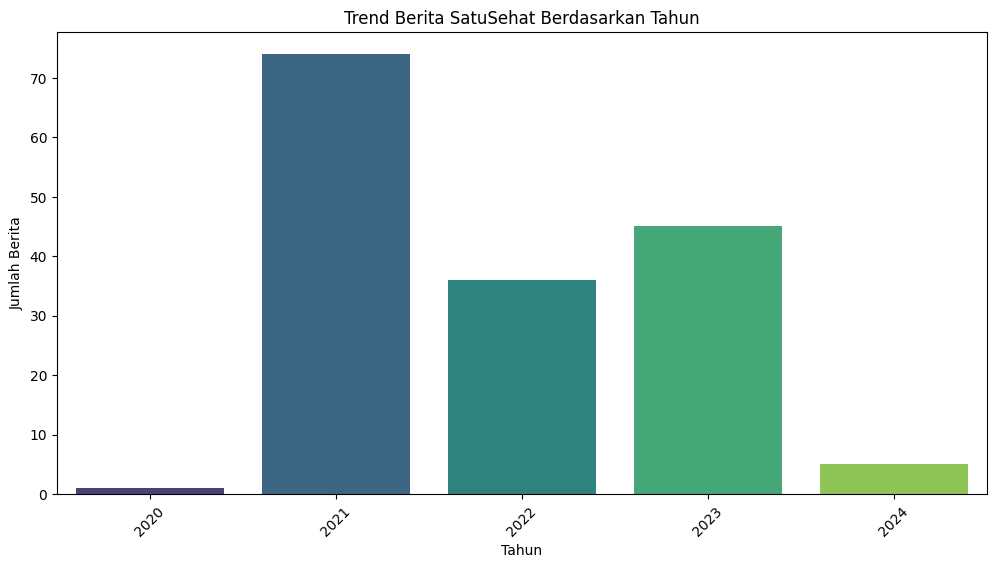

In [ ]:
# Menghitung jumlah berita per tahun
news_by_year = satusehat_news_df['tahun'].value_counts().sort_index()

# Membuat diagram batang tren berita berdasarkan tahun
plt.figure(figsize=(12, 6))
sns.barplot(x=news_by_year.index, y=news_by_year.values, palette='viridis')
plt.title("Trend Berita SatuSehat Berdasarkan Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Berita")
plt.xticks(rotation=45)
plt.show()

<ipython-input-18-cce33e2ef912>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=portal_count.index, y=portal_count.values, palette='viridis')


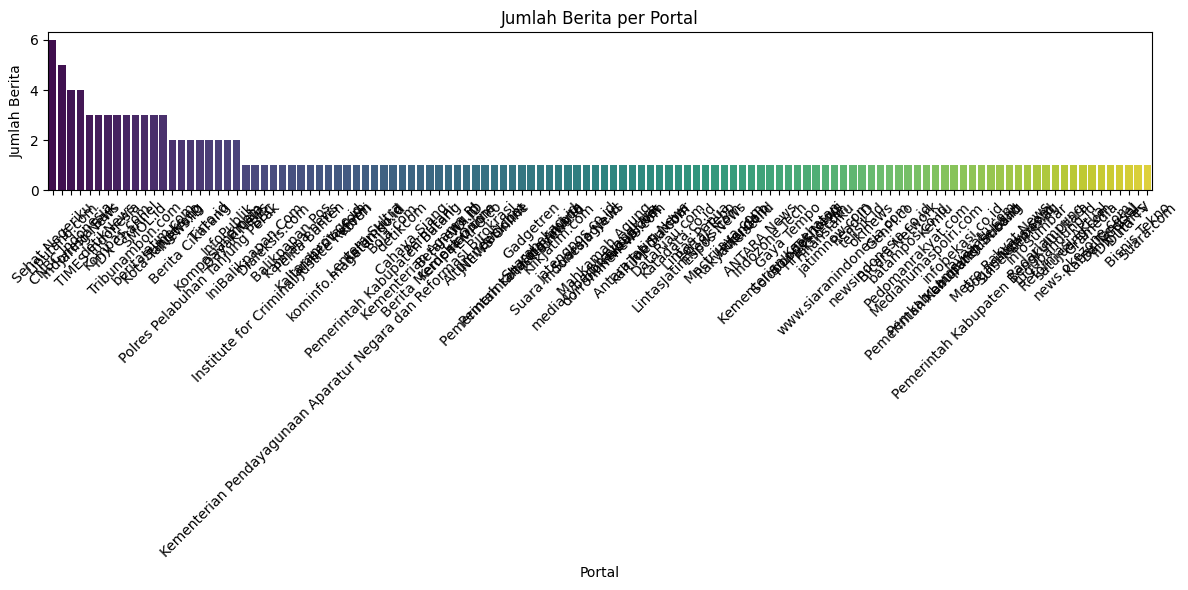

In [ ]:
# Menghitung jumlah berita per portal
portal_count = satusehat_news_df['portal'].value_counts()

# Membuat diagram batang untuk jumlah berita per portal
plt.figure(figsize=(12, 6))
sns.barplot(x=portal_count.index, y=portal_count.values, palette='viridis')

# Menambahkan elemen pada grafik
plt.title("Jumlah Berita per Portal")
plt.xlabel("Portal")
plt.ylabel("Jumlah Berita")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-19-0dafd3e8144a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_portal.index, y=top_15_portal.values, palette='viridis')


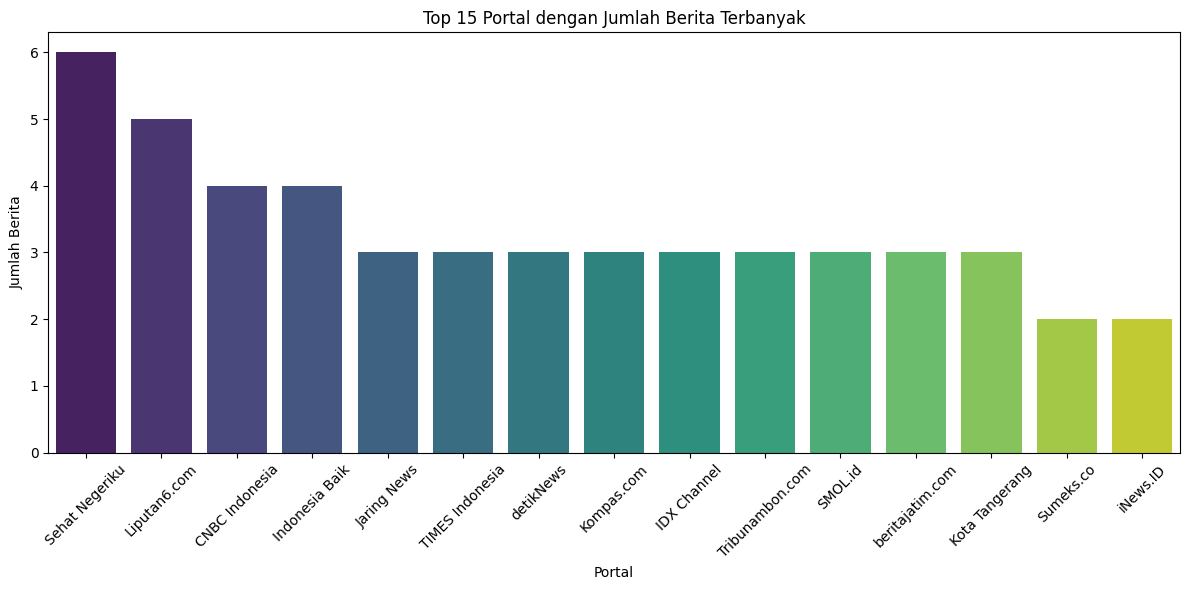

In [ ]:
# Menghitung jumlah berita per portal dan memilih top 15
top_15_portal = satusehat_news_df['portal'].value_counts().head(15)

# Membuat diagram batang untuk top 15 portal
plt.figure(figsize=(12, 6))
sns.barplot(x=top_15_portal.index, y=top_15_portal.values, palette='viridis')

# Menambahkan elemen pada grafik
plt.title("Top 15 Portal dengan Jumlah Berita Terbanyak")
plt.xlabel("Portal")
plt.ylabel("Jumlah Berita")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Dari Segi Munculnya Kata "PeduliLindungi" pada Berita

<ipython-input-10-b54b96c4f98a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pedulilindungi_by_year.index, y=pedulilindungi_by_year.values, palette='Greens')


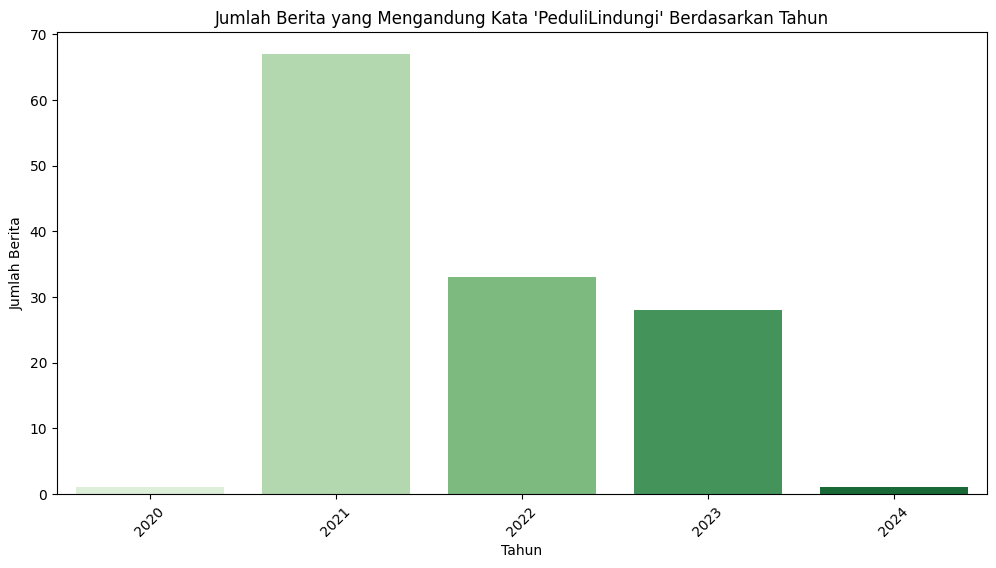

In [ ]:
# Filter berita yang mengandung "PeduliLindungi" pada kolom judul
pedulilindungi_filter = satusehat_news_df[satusehat_news_df['judul'].str.contains('PeduliLindungi', case=False, na=False)]

# Membuat diagram batang jumlah berita "PeduliLindungi" per tahun
pedulilindungi_by_year = pedulilindungi_filter['tahun'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=pedulilindungi_by_year.index, y=pedulilindungi_by_year.values, palette='Greens')
plt.title("Jumlah Berita yang Mengandung Kata 'PeduliLindungi' Berdasarkan Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Berita")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Pastikan kolom 'tanggal' dalam format datetime
satusehat_news_df['tanggal'] = pd.to_datetime(satusehat_news_df['tanggal'])

# Filter data berdasarkan judul yang mengandung "PeduliLindungi" dan tanggal antara 2023-03 hingga 2024
pedulilindungi_filter_2023_2024 = satusehat_news_df[
    satusehat_news_df['judul'].str.contains('PeduliLindungi', case=False, na=False)
]
pedulilindungi_filter_2023_2024 = pedulilindungi_filter_2023_2024[
    (pedulilindungi_filter_2023_2024['tanggal'] >= '2023-03-01') & (pedulilindungi_filter_2023_2024['tanggal'] <= '2024-12-31')
]

# Menampilkan judul dan tanggal
pedulilindungi_filter_2023_2024[['judul', 'tanggal']]


,judul,tanggal
0,"dinilai PeduliLindungi para pekerja, bpjs kete...",2024-09-22
5,"mulai 1 november, masuk palembang square mal w...",2023-11-20
9,dukung transformasi PeduliLindungi jadi SatuSe...,2023-09-25
10,scan barcode PeduliLindungi,2023-08-22
15,perbedaan PeduliLindungi dengan aplikasi SatuS...,2023-03-16
17,PeduliLindungi resmi berubah menjadi SatuSehat...,2023-03-09
19,aplikasi PeduliLindungi terintegrasi ke SatuSe...,2023-03-03
20,cara gunakan aplikasi SatuSehat pengganti Pedu...,2023-03-03
21,aplikasi SatuSehat untuk apa? ini sederet manf...,2023-03-03
24,PeduliLindungi resmi berubah menjadi SatuSehat,2023-03-02


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['tanggal']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'tanggal'}, axis=1)
              .sort_values('tanggal', ascending=True))
  xs = counted['tanggal']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('tanggal', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('tanggal')
_ = plt.ylabel('count()')

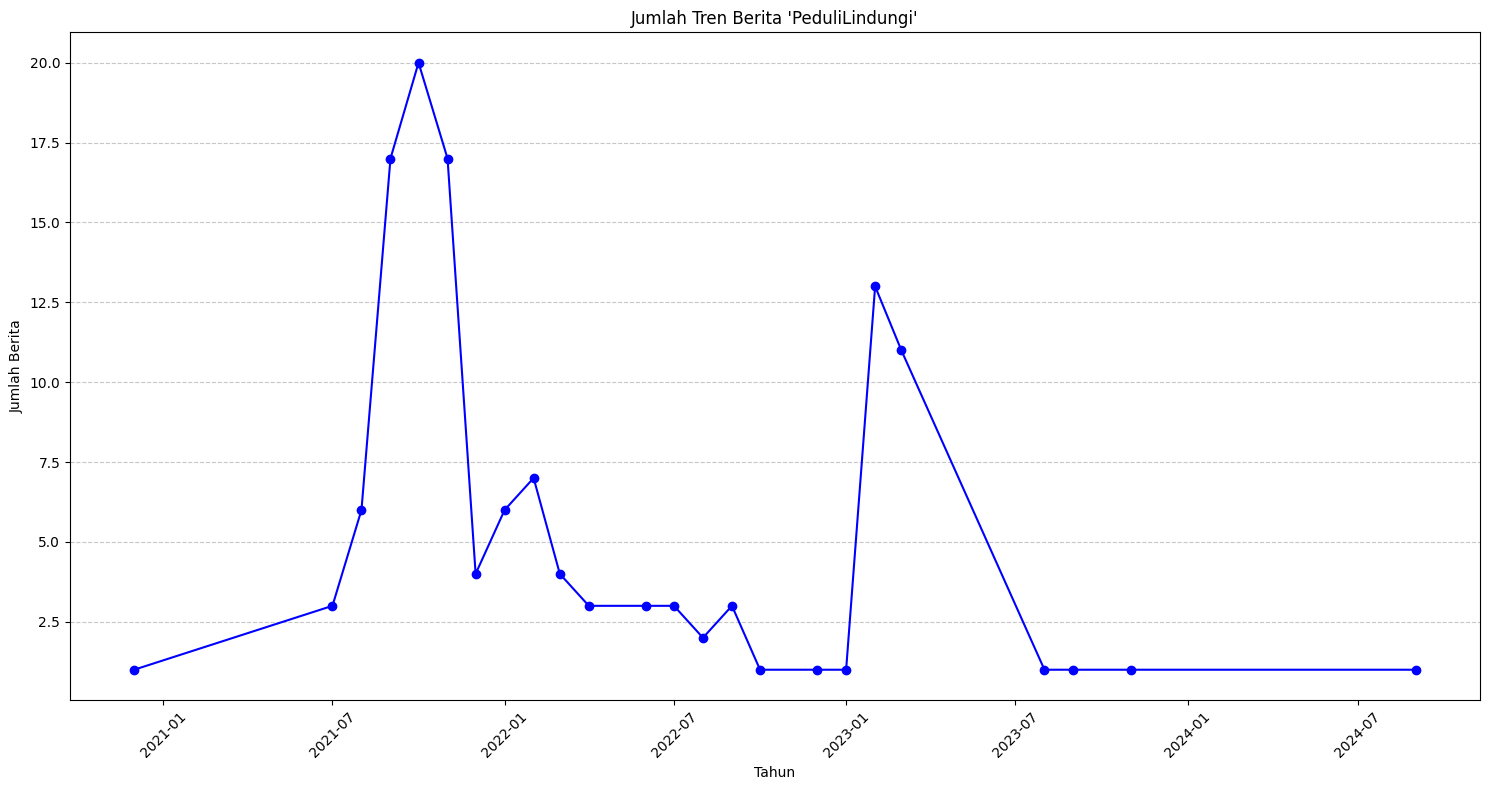

In [ ]:
# Menggabungkan tahun dan bulan menjadi kolom tanggal untuk time series
pedulilindungi_by_month_year_sorted['tanggal'] = pd.to_datetime(
    pedulilindungi_by_month_year_sorted['tahun'].astype(str) + '-' + pedulilindungi_by_month_year_sorted['bulan'].astype(str),
    format='%Y-%B'
)

# Mengatur index sebagai datetime
time_series_data = pedulilindungi_by_month_year_sorted.set_index('tanggal')

# Membuat plot time series
plt.figure(figsize=(15, 8))
plt.plot(time_series_data.index, time_series_data['jumlah_berita'], marker='o', linestyle='-', color='b')

# Menambahkan elemen pada grafik
plt.title("Jumlah Tren Berita 'PeduliLindungi'")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Berita")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


             word  frequency
0  PeduliLindungi        420
1        aplikasi        393
2      masyarakat        225
3         covid19        164
4          vaksin        153
5              qr        139
6       vaksinasi        137
7            code        133
8       kesehatan        129
9      pemerintah        128


<ipython-input-16-51caa37d64ed>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_words_df, x='word', y='frequency', palette='viridis')


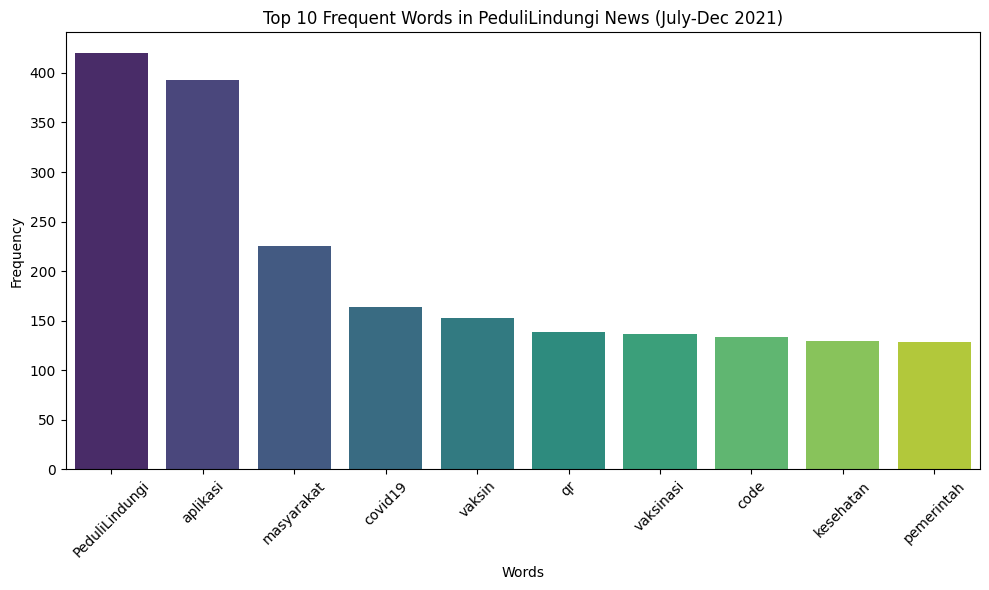

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan kolom 'tanggal' dalam format datetime
satusehat_news_df['tanggal'] = pd.to_datetime(satusehat_news_df['tanggal'])

# Filter data berdasarkan judul yang mengandung "PeduliLindungi" dan tanggal antara 2021-07 hingga 2021-12
pedulilindungi_filter = satusehat_news_df[
    satusehat_news_df['judul'].str.contains('PeduliLindungi', case=False, na=False)
]
pedulilindungi_filter = pedulilindungi_filter[
    (pedulilindungi_filter['tanggal'] >= '2021-07-01') & (pedulilindungi_filter['tanggal'] <= '2021-12-31')
]

# Gabungkan semua teks dalam kolom 'content_without_stopwords'
all_words = ' '.join(pedulilindungi_filter['content_without_stopwords'])

# Hitung frekuensi kata
word_freq = Counter(all_words.split())

# Ambil top 10 kata yang sering muncul
top_words = dict(word_freq.most_common(10))

# Membuat DataFrame untuk visualisasi
top_words_df = pd.DataFrame(top_words.items(), columns=['word', 'frequency'])

# Tampilkan frekuensi kata
print(top_words_df)

# Membuat diagram frekuensi kata
plt.figure(figsize=(10, 6))
sns.barplot(data=top_words_df, x='word', y='frequency', palette='viridis')
plt.title("Top 10 Frequent Words in PeduliLindungi News (July-Dec 2021)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Dari Segi Munculnya Kata "SatuSehat" pada Berita

<ipython-input-8-58775efc0e1a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=satusehat_by_year.index, y=satusehat_by_year.values, palette='Blues')


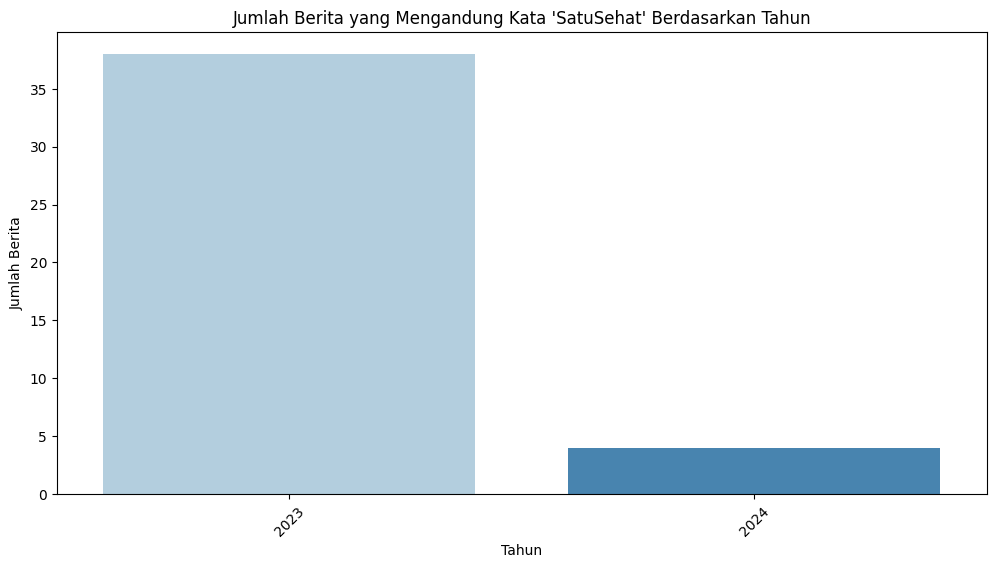

In [ ]:
# Filter berita yang mengandung "SatuSehat" pada kolom judul
satusehat_filter = satusehat_news_df[satusehat_news_df['judul'].str.contains('SatuSehat', case=False, na=False)]

# Membuat diagram batang jumlah berita "SatuSehat" per tahun
satusehat_by_year = satusehat_filter['tahun'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=satusehat_by_year.index, y=satusehat_by_year.values, palette='Blues')
plt.title("Jumlah Berita yang Mengandung Kata 'SatuSehat' Berdasarkan Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Berita")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Filter berita untuk tahun 2023 dan 2024 dengan judul yang mengandung 'SatuSehat'
satudsehat_2023 = satusehat_news_df[(satusehat_news_df['judul'].str.contains('SatuSehat', case=False, na=False)) & (satusehat_news_df['tahun'] == 2023)]
satudsehat_2024 = satusehat_news_df[(satusehat_news_df['judul'].str.contains('SatuSehat', case=False, na=False)) & (satusehat_news_df['tahun'] == 2024)]

# Menggabungkan semua teks dalam 'content_without_stopwords' untuk tahun 2023
all_words_2023 = ' '.join(satudsehat_2023['content_without_stopwords'])

# Menghitung frekuensi kata untuk tahun 2023
word_freq_2023 = Counter(all_words_2023.split())
top_10_words_2023 = dict(word_freq_2023.most_common(10))

# Menampilkan top 10 kata dan frekuensinya untuk tahun 2023
print("Top 10 kata untuk tahun 2023:")
for word, freq in top_10_words_2023.items():
    print(f"{word}: {freq}")

# Menggabungkan semua teks dalam 'content_without_stopwords' untuk tahun 2024
all_words_2024 = ' '.join(satudsehat_2024['content_without_stopwords'])

# Menghitung frekuensi kata untuk tahun 2024
word_freq_2024 = Counter(all_words_2024.split())
top_10_words_2024 = dict(word_freq_2024.most_common(10))

# Menampilkan top 10 kata dan frekuensinya untuk tahun 2024
print("\nTop 10 kata untuk tahun 2024:")
for word, freq in top_10_words_2024.items():
    print(f"{word}: {freq}")

# Menentukan bulan dengan frekuensi terbanyak pada tahun 2023 untuk 'SatuSehat'
satudsehat_2023['bulan'] = satudsehat_2023['tanggal'].dt.month_name()
month_count_2023 = satudsehat_2023['bulan'].value_counts().sort_index()

# Menampilkan bulan dengan jumlah terbanyak untuk tahun 2023
print("\nBulan dengan frekuensi terbanyak untuk 'SatuSehat' pada tahun 2023:")
for month, count in month_count_2023.items():
    print(f"{month}: {count}")


Top 10 kata untuk tahun 2023:
SatuSehat: 540
kesehatan: 473
aplikasi: 391
data: 212
mobile: 199
masyarakat: 196
PeduliLindungi: 196
platform: 148
medis: 139
kemenkes: 123

Top 10 kata untuk tahun 2024:
kesehatan: 35
SatuSehat: 21
2024: 17
surabaya: 13
1: 13
jam: 12
umrah: 12
aplikasi: 12
dr: 11
indonesia: 11

Bulan dengan frekuensi terbanyak untuk 'SatuSehat' pada tahun 2023:
April: 1
February: 15
March: 17
May: 2
November: 2
September: 1


<ipython-input-20-eec368af0e0d>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  satudsehat_2023['bulan'] = satudsehat_2023['tanggal'].dt.month_name()


<ipython-input-21-5dcb54d18e6c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_10_words_2023_df, palette='Blues')


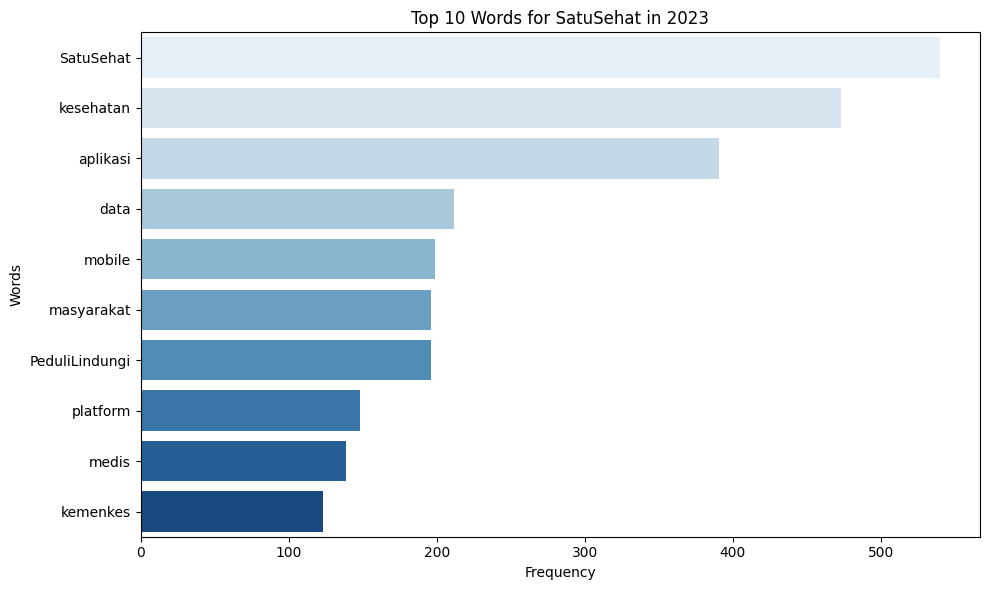

<ipython-input-21-5dcb54d18e6c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_10_words_2024_df, palette='Greens')


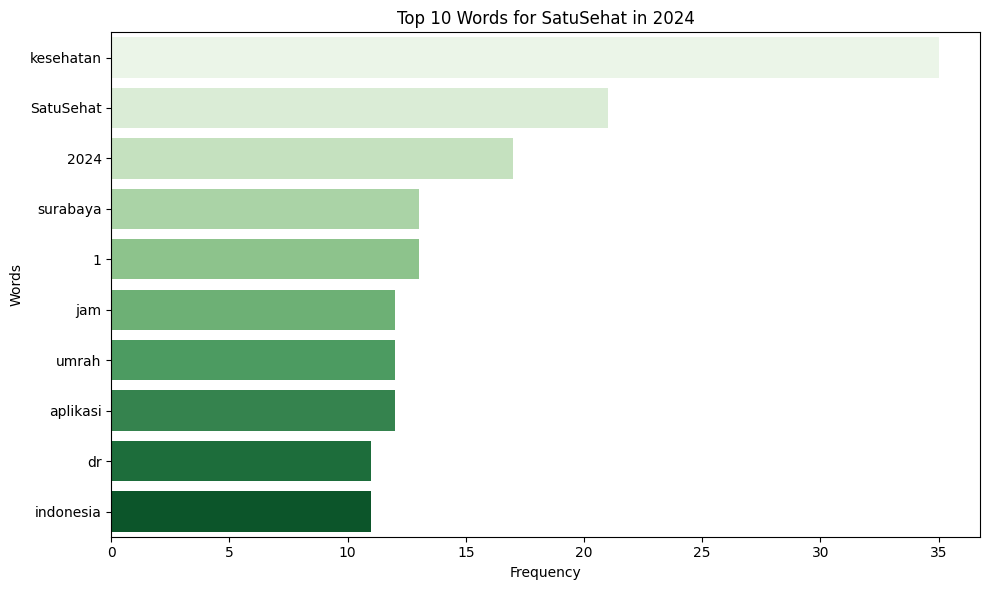

<ipython-input-21-5dcb54d18e6c>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_count_2023.index, y=month_count_2023.values, palette='Purples')


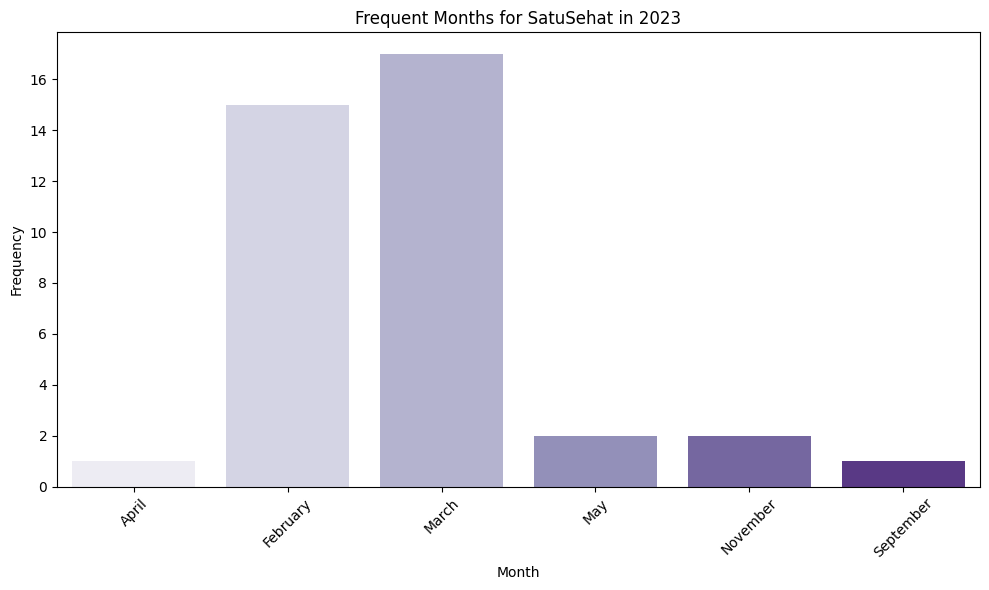

In [ ]:
# Visualisasi Top 10 kata untuk tahun 2023
top_10_words_2023_df = pd.DataFrame(top_10_words_2023.items(), columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=top_10_words_2023_df, palette='Blues')
plt.title("Top 10 Words for SatuSehat in 2023")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()
plt.show()

# Visualisasi Top 10 kata untuk tahun 2024
top_10_words_2024_df = pd.DataFrame(top_10_words_2024.items(), columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=top_10_words_2024_df, palette='Greens')
plt.title("Top 10 Words for SatuSehat in 2024")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()
plt.show()

# Visualisasi bulan dengan frekuensi terbanyak pada tahun 2023
plt.figure(figsize=(10, 6))
sns.barplot(x=month_count_2023.index, y=month_count_2023.values, palette='Purples')
plt.title("Frequent Months for SatuSehat in 2023")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## POS-Tagging Artikel Berita SatuSehat

In [3]:
# Install Dependencies
!pip install polyglot
!pip install pyicu
!pip install pycld2
!pip install morfessor
!pip install wordcloud
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52562 sha256=2d5d6fd8085e2e0c78850852a5efa530c405d4b9f0ab20a06fc5a778a7153bd6
  Stored in directory: /root/.cache/pip/wheels/aa/92/4a/b172589446ba537db3bdb9a1f2204f27fe71217981c14ac368
Successfully built polyglot
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.9/263.9 kB 6.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyicu: filename=PyICU-2.14-cp310-cp310-linux_x86_64.whl size=1809836 sha256=eeb058eb68fda9087c3ac6acb6cb68bc5c8aaafeb74590f49865b2a71608371f
  Stored in directory: /root/.cache/pip/wheels/78/6e/76/17c73021179c06c29d9b108896b9248da0de4f2af93f63d405
Successfully built pyicu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 20.2 MB/s eta 

In [4]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [5]:
# Install Polyglot Embeddings untuk Bahasa Indonesia
!polyglot download pos2.id
!polyglot download embeddings2.id

[polyglot_data] Downloading package pos2.id to /root/polyglot_data...
[polyglot_data] Downloading package embeddings2.id to
[polyglot_data]     /root/polyglot_data...


In [6]:
import nltk
import pandas as pd
from collections import Counter
from textblob import TextBlob

# Store all POS tags and words
all_words = []
all_pos_tags = []
word_pos_map = {}

# Loop through each review in 'content_without_stopwords' column
for content in satusehat_news_df['content_without_stopwords']:
    if content.strip():  # Check if content is not empty
        text = TextBlob(content)  # Process the content using TextBlob for POS tagging
        pos_tags = text.tags  # Get POS tags

        # Collect words and their corresponding POS tags
        for word, pos in pos_tags:
            word_lower = word.lower()
            all_words.append(word_lower)
            all_pos_tags.append(pos)

            # Map each POS tag with the corresponding word
            if pos in word_pos_map:
                word_pos_map[pos].append(word_lower)
            else:
                word_pos_map[pos] = [word_lower]

# Calculate count of POS tags
pos_counts = Counter(all_pos_tags)

# Calculate unique tokens for each POS tag
unique_tokens_count = {pos: len(set(words)) for pos, words in word_pos_map.items()}

# Prepare data for the DataFrame
tag_data = []
for pos, count in pos_counts.items():
    unique_tokens = unique_tokens_count.get(pos, 0)
    tag_data.append({'Tag': pos, 'Count': count, 'Unique Tokens': unique_tokens})

# Create DataFrame
pos_df = pd.DataFrame(tag_data)

# Display the DataFrame
print(pos_df)


     Tag  Count  Unique Tokens
0     NN  30544           5091
1    NNP   2719            121
2     RB    158             78
3     JJ   6279           1670
4     FW    382            125
5    VBZ    835            251
6     CD   2318            466
7    VBD   1092            422
8     IN    330             97
9    NNS   1924            280
10   VBP   1587            583
11   WRB      7              5
12    VB    229             78
13  PRP$     31              4
14    MD     12              5
15   VBN     66             22
16    CC     40             11
17    DT    100              9
18   PRP     16              4
19    TO     28              1
20   VBG    240             64
21    WP     82              6
22   JJS      9              2
23   PDT      2              1
24   RBS      4              4
25   JJR      9              5
26    RP      7              3
27   RBR      7              1


In [7]:
# Download the CSV
pos_df.to_csv('pos_tag_counts_satusehat_article_news.csv', index=False)

### Menghitung Frekuensi Kata dan POS

In [8]:
# Count word frequency
word_counts = Counter(all_words)

# Count POS tag frequency
pos_counts = Counter(all_pos_tags)

# Display the most common words and POS tags
print("Top 10 most common words:", word_counts.most_common(10))
print("Top 10 most common POS tags:", pos_counts.most_common(10))

Top 10 most common words: [('aplikasi', 1123), ('pedulilindungi', 994), ('kesehatan', 870), ('masyarakat', 606), ('satusehat', 569), ('vaksin', 475), ('data', 464), ('covid19', 407), ('”', 399), ('“', 383)]
Top 10 most common POS tags: [('NN', 30544), ('JJ', 6279), ('NNP', 2719), ('CD', 2318), ('NNS', 1924), ('VBP', 1587), ('VBD', 1092), ('VBZ', 835), ('FW', 382), ('IN', 330)]


### Membuat DataFrame untuk Kata, POS Tag, dan Frekuensi

In [9]:
import pandas as pd
from textblob import TextBlob
from collections import Counter

# Hitung frekuensi kata pada kolom content_without_stopwords
word_counts = Counter()

for content in satusehat_news_df['content_without_stopwords']:
    if content.strip():
        words = content.split()
        word_counts.update(words)

# Create a DataFrame to store words, POS tags, and their frequencies
word_info = []

for word, freq in word_counts.items():
    # Find the POS tag for the word
    pos_tag = None
    for content in satusehat_news_df['content_without_stopwords']:
        if content.strip():
            text = TextBlob(content)  # 'TextBlob' will handle POS tagging
            for w, pos in text.tags:
                if w.lower() == word:
                    pos_tag = pos
                    break
            if pos_tag:
                break
    word_info.append((word, pos_tag, freq))

# Create DataFrame
word_info_df = pd.DataFrame(word_info, columns=['Word', 'POS Tag', 'Frequency'])

# Display the DataFrame
word_info_df.head()


,Word,POS Tag,Frequency
0,dinilai,NN,5
1,PeduliLindungi,None,967
2,pekerja,NN,7
3,bpjs,NN,13
4,ketenagakerjaan,NN,11


In [10]:
# Get the top 10 most frequent words
top_10_words = word_info_df.nlargest(10, 'Frequency')

# Display the top 10 words
print(top_10_words)

                Word POS Tag  Frequency
267         aplikasi      NN       1120
1     PeduliLindungi    None        967
78         kesehatan      NN        863
22        masyarakat      NN        604
268        SatuSehat    None        566
335           vaksin      NN        478
544             data     NNS        462
101          covid19      NN        389
1374      sertifikat      NN        341
286        vaksinasi      NN        295


In [11]:
# Save df to CSV file
output_file = 'words_pos_freq_satusehat_article_news.csv'
word_info_df.to_csv(output_file, index=False)

## NER

                           content_without_stopwords  \
0  dinilai PeduliLindungi pekerja bpjs ketenagake...   
1  06 okt 2024 06 okt 2024 polrestabes surabaya 2...   
2  bicaranetworkcom menanggulangi penyebaran peny...   
3  genpico bandara i gusti ngurah rai bali mewaji...   
4  news indonesia foto direktur rumah sakit daera...   

                                        ner_entities  
0  [(PeduliLindungi, PERSON), (perhatian ekstra b...  
1  [(06, CARDINAL), (2024, DATE), (2024, DATE), (...  
2  [(bicaranetworkcom menanggulangi, ORG), (penye...  
3  [(genpico bandara, PERSON), (mewajibkan penump...  
4  [(indonesia, GPE), (erliyati sumenep news, ORG...  


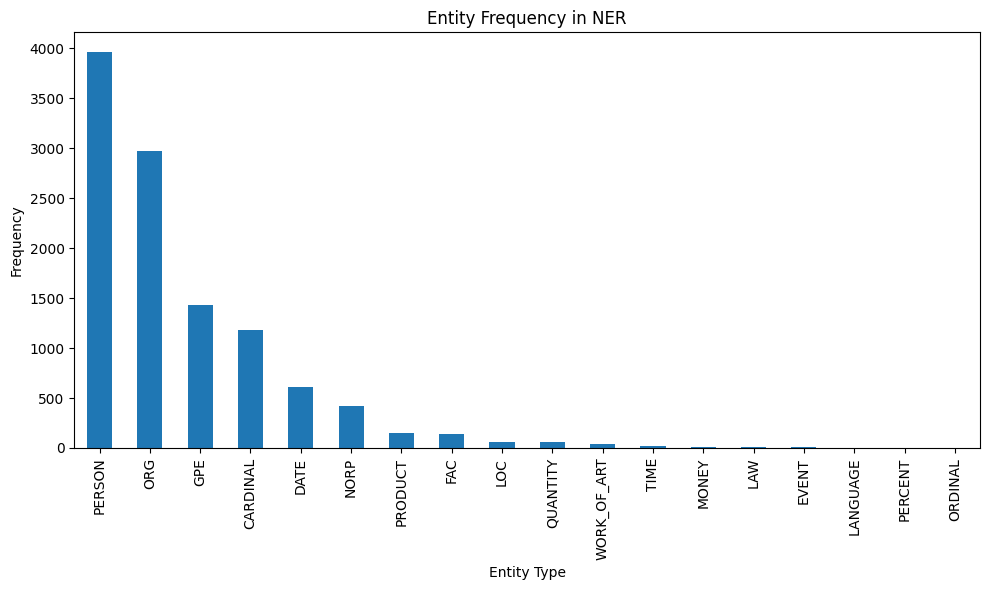

In [12]:
import spacy
import pandas as pd
from spacy import displacy
import matplotlib.pyplot as plt

# Load pre-trained spaCy model for NER (English model)
nlp = spacy.load("en_core_web_sm")  # Use "id_core_news_sm" for Bahasa Indonesia, or another model

# Apply NER on content_without_stopwords
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Create a new column 'ner_entities' to store the NER results
satusehat_news_df['ner_entities'] = satusehat_news_df['content_without_stopwords'].apply(extract_entities)

# Example: Display the first few rows to see the NER entities
print(satusehat_news_df[['content_without_stopwords', 'ner_entities']].head())

# Save the NER results into a CSV
satusehat_news_df[['content_without_stopwords', 'ner_entities']].to_csv('satusehat_article_news_ner_results.csv', index=False)

# Visualize NER results on the first article as an example
doc = nlp(satusehat_news_df['content_without_stopwords'].iloc[0])
displacy.render(doc, style='ent', jupyter=True)

# Optionally, you can visualize named entities in a bar chart
# Count the frequency of each entity type
entity_counts = [ent.label_ for doc in satusehat_news_df['content_without_stopwords'].apply(nlp)
                 for ent in doc.ents]
entity_counts_df = pd.DataFrame(entity_counts, columns=['Entity Type'])
entity_counts_plot = entity_counts_df['Entity Type'].value_counts().plot(kind='bar', figsize=(10, 6))

# Set the title and labels for the bar plot
entity_counts_plot.set_title('Entity Frequency in NER')
entity_counts_plot.set_xlabel('Entity Type')
entity_counts_plot.set_ylabel('Frequency')

# Display the bar plot
plt.tight_layout()
plt.show()